<a href="https://colab.research.google.com/github/aymen0627/ML_Topics/blob/Applications/Group_8_Problem_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Problem 7

In [ ]:
"""

In this problem, assume that the output of a network is given by h(x) = wT x, where
w = [−0.2 − 0.4 0 0.4 0.2]T
Using η = −y ϵ sign(w), find the minimum required perturbations
(approximately) to fool the two test examples below by searching within the window of allowed
perturbations of [0.001, 0.500] (use a step of 0.001). The first (second) vector has a true label of +1
(-1).
"""

'\n\nIn this problem, assume that the output of a network is given by h(x) = wT x, where\nw = [−0.2 − 0.4 0 0.4 0.2]T\nUsing η = −y ϵ sign(w), find the minimum required perturbations\n(approximately) to fool the two test examples below by searching within the window of allowed\nperturbations of [0.001, 0.500] (use a step of 0.001). The first (second) vector has a true label of +1\n(-1).\n'

In [ ]:
"""
a = [−0.04046774 − 0.05453599 − 0.15464773 0.09823674 − 0.11010676]T

b = [0.07450563 0.19761108 − 0.12441233 − 0.06264169 − 0.08037661]T

"""

'\na = [−0.04046774 − 0.05453599 − 0.15464773 0.09823674 − 0.11010676]T\n\nb = [0.07450563 0.19761108 − 0.12441233 − 0.06264169 − 0.08037661]T\n\n'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Assume that the output of a NN is given as h(x) = w^T x
number_of_features = 5
w = np.transpose(np.array([-0.2, -0.4, 0, 0.4, 0.2]))

a = np.array([-0.04046774, -0.05453599, -0.15464773, 0.09823674, -0.11010676])
b = np.array([0.07450563, 0.19761108, -0.12441233, -0.06264169, -0.08037661])

print("The shape of the weight vector is = ", w.shape)
print("The weight vector is = ", w)

The shape of the weight vector is =  (5,)
The weight vector is =  [-0.2 -0.4  0.   0.4  0.2]


In [ ]:
def h(x, w):
    return np.dot(w, x)
def l(h, y):
    return np.log(1 + np.exp(-y*h))
def eta(y, x, w):
    return -y * np.dot(x, w)

In [ ]:
# Assume that we have a testing data point given along with its true label:
np.random.seed(seed=3)
x_test_sample = np.random.normal(loc = 0.0, scale=0.1, size=(number_of_features,))

# we can infer the predicted label by first computing the output as
output_h = h(x_test_sample,w)

# use a signum function or a logic to get the preducted label as
predicted_label = np.sign(output_h)

# we can define a prediction model that returns the output_value, and the predicted label
def pred_model(weights_vector, input_sample):
  output_h = h(input_sample,weights_vector)
  predicted_label = np.sign(output_h)
  return output_h, predicted_label
  

print("The test sample is ", x_test_sample)
print("The test sample output is ", [output_h])
print("The test sample predicted label is ", [predicted_label])

The test sample is  [ 0.17886285  0.04365099  0.00964975 -0.18634927 -0.02773882]
The test sample output is  [-0.13332043567395357]
The test sample predicted label is  [-1.0]


Next, we use $\eta = -y~\epsilon~\text{sign}(w)$ to fool the network w.r.t. the test example. We will use different values of $\epsilon$ to induce the label changing.

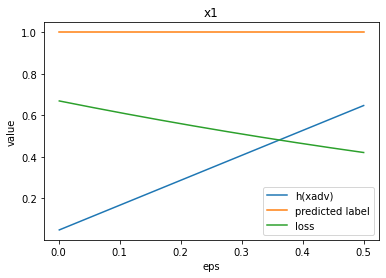

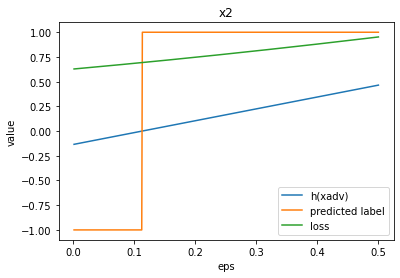

In [ ]:
# define some range of values for the allowed perturbations
eps = np.arange(0.001, 0.501, 0.001)
x = [a, b]
y = [1, -1]
for i in range(len(x)):
  plt.figure(i)
  plt.title('x' + str(i+1))
  plt.xlabel('eps')
  plt.ylabel('value')
  plt.plot(eps, [h(x[i] + e*np.sign(w), w) for e in eps], label='h(xadv)')
  plt.plot(eps, [np.sign(h(x[i] + e*np.sign(w), w)) for e in eps], label='predicted label')
  plt.plot(eps, [l(h(x[i] + e*np.sign(w), w), y[i]) for e in eps], label='loss')
  plt.legend()
plt.show()
#min permutations found by using each index of X adjusted by each signed epsilon with each weight passing it into the output of the network
#slightly adjusting X based on epsilon and the signum of the weight and passing that back into the output network
#and then comparing that against the labels to find the loss
#result shown in graph below